<a href="https://colab.research.google.com/github/mkalw/UTS_ML2019_ID12572350_ID12595512/blob/master/Multiple_Linear_Regression_for_House_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Importing Libraries and Data Model

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression


In [0]:
#Import data into a data frame
data = pd.read_csv('https://raw.githubusercontent.com/mkalw/UTS_ML2019_ID12572350_ID12595512/master/train.csv')

#Import test data into data frame
test = pd.read_csv('https://raw.githubusercontent.com/mkalw/UTS_ML2019_ID12572350_ID12595512/master/testdata.csv')
actual = pd.read_csv('https://raw.githubusercontent.com/mkalw/UTS_ML2019_ID12572350_ID12595512/master/actual.csv')

In [3]:
#Analysing Mssing Values
missing = data.isnull().sum().sort_values(ascending = False)
missing = missing.reset_index()
missing['Percent'] = missing.iloc[:, 1].apply(lambda x: x*100/np.sum(missing.iloc[:, 1]))
missing.columns = ['Attributes', 'Missing', 'Percent']
gtz = missing['Missing'] > 0
missing = missing[gtz]
missing

,Attributes,Missing,Percent
0,PoolQC,1162,20.884256
1,MiscFeature,1127,20.255212
2,Alley,1093,19.644141
3,Fence,953,17.127965
4,FireplaceQu,547,9.831057
5,LotFrontage,210,3.774263
6,GarageCond,61,1.096334
7,GarageType,61,1.096334
8,GarageYrBlt,61,1.096334
9,GarageFinish,61,1.096334


In [0]:
def scatterplot(var):
    dataplots = pd.concat([data['SalePrice'], data[var]], axis=1);
    dataplots.plot.scatter(x=var, y='SalePrice', ylim=(0,900000));

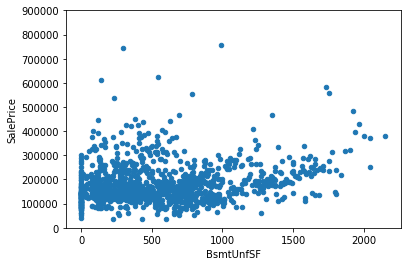

In [5]:
scatterplot('BsmtUnfSF')

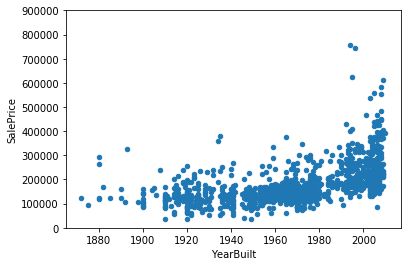

In [6]:
scatterplot('YearBuilt')

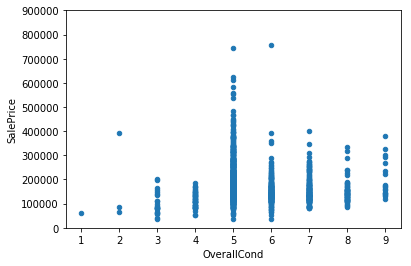

In [7]:
scatterplot('OverallCond')

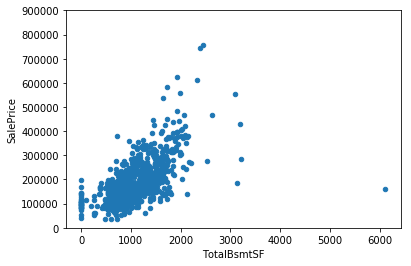

In [8]:
scatterplot('TotalBsmtSF')

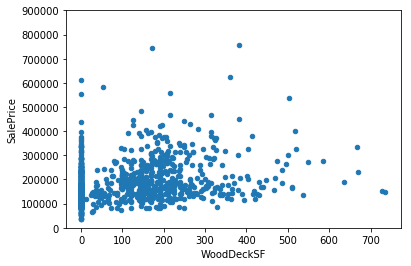

In [9]:
scatterplot('WoodDeckSF')

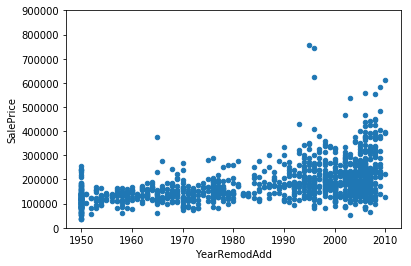

In [10]:
scatterplot('YearRemodAdd')

In [11]:
# Here we determined the variables we will use based on its effect on the sale price (X variables)
year_built = list(data['YearBuilt'])
overall_condition = list(data['OverallCond'])
liv_area = list(data['GrLivArea'])
lot_area = list(data['LotArea'])
overall_qual = list(data['OverallQual'])
year_remod = list(data['YearRemodAdd'])
wood_deck = list(data['WoodDeckSF'])
total_bsmt = list(data['TotalBsmtSF'])
bsmt_unf = list(data['BsmtUnfSF'])

# Y variable
house_price = list(data['SalePrice'])

# X variables of test data
year_built_test = list(data['YearBuilt'])
overall_condition_test = list(data['OverallCond'])
liv_area_test = list(data['GrLivArea'])
lot_area_test = list(data['LotArea'])
overall_qual_test = list(data['OverallQual'])
year_remod_test = list(data['YearRemodAdd'])
wood_deck_test = list(data['WoodDeckSF'])
total_bsmt_test = list(data['TotalBsmtSF'])
bsmt_unf_test = list(data['BsmtUnfSF'])
print("Variables are: year_built, overall_condition, liv_area, lot_area, overall_qual, year_remod, wood_deck, total_bsmt, bsmt_unf")


Variables are: year_built, overall_condition, liv_area, lot_area, overall_qual, year_remod, wood_deck, total_bsmt, bsmt_unf


In [0]:
# In this part we concatenated the variables in order to create the array.
array_variables = []
for i1,i2,i3,i4,i5,i6,i7,i8,i9 in zip(year_built,overall_condition,liv_area,lot_area, overall_qual, year_remod, wood_deck, total_bsmt, bsmt_unf):
    array_variables.append([i1,i2,i3,i4,i5,i6, i7, i8,i9])

  
  
array_variables_test = []
for i1,i2,i3,i4,i5,i6,i7,i8,i9  in zip(year_built_test,overall_condition_test,liv_area_test,lot_area_test, overall_qual_test, year_remod_test, wood_deck_test, total_bsmt_test, bsmt_unf_test):
    array_variables_test.append([i1,i2,i3,i4,i5,i6, i7, i8,i9])



In [13]:
# Training the model
reg = LinearRegression()
model = reg.fit(array_variables,house_price)
y_pred = model.predict(array_variables_test)

# Print out the predicted values of test data
print("Predicted values: ", y_pred)

Predicted values:  [144426.32016609 248979.74294277 189498.48137198 ... 242407.96462047
 148325.90131702 174704.79271246]


In [14]:
#Measuring the accuracy of the model using R2
model.score(array_variables,house_price)

0.7708753465526699